## CalTech 101 Image classficiation using pretrained models(ResNet,Efficientnet)

#### Import libraries

In [106]:
import torch 
import torch.nn as nn
import torch.optim as optim

from torchvision import datasets,models,transforms
from torch.utils.data import DataLoader,random_split

import matplotlib.pyplot as plt
import torchvision
import numpy as np


#### Device connection

In [108]:
import torch

if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

device

device(type='mps')

In [110]:
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
device

device(type='mps')

#### Transform and Load the dataset

In [112]:
transforms= transforms.Compose([
    transforms.Resize((128,128)),#resize iamges to a fized size
    transforms.RandomHorizontalFlip(),#random flip images horizonattaly
    transforms.RandomRotation(10),#randomly rotate images
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
transforms

Compose(
    Resize(size=(128, 128), interpolation=bilinear, max_size=None, antialias=True)
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
)

In [114]:
dataset=datasets.ImageFolder(root="./images",transform=transforms)
len(dataset)

9144

In [ ]:
#it will go through  all the sub-directories in the image folder and assign the classes, classes are sub-directories names

In [116]:
dataset.classes

['BACKGROUND_Google',
 'Faces',
 'Faces_easy',
 'Leopards',
 'Motorbikes',
 'accordion',
 'airplanes',
 'anchor',
 'ant',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooste

In [118]:
train_size=int(len(dataset)*0.8)
test_size=len(dataset)-train_size
print(train_size,test_size)

7315 1829


#### Random split

In [120]:
train_dataset,test_dataset=random_split(dataset,[train_size,test_size])

In [122]:
len(train_dataset),len(test_dataset)

(7315, 1829)

#### Data Loader

In [124]:
train_loader=DataLoader(train_dataset,shuffle=True,batch_size=32)
test_loader=DataLoader(test_dataset,shuffle=True,batch_size=32)

#### Data Visualization

In [126]:
for i, (images,labels) in enumerate(train_loader):
    print(images.shape)
    print(labels.shape)
    break

torch.Size([32, 3, 128, 128])
torch.Size([32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.25..0.25].


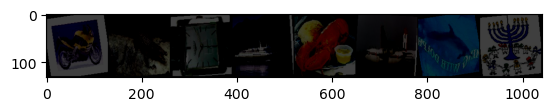

In [128]:
def imshow(img):
    img=img/2*0.5 #unnormalize
    img_array=img.numpy()
    plt.imshow(np.transpose(img_array,(1,2,0)))
    plt.show()


#show images
imshow(torchvision.utils.make_grid(images[8:16]))

In [130]:
dataset.classes[:2]

['BACKGROUND_Google', 'Faces']

In [132]:
[dataset.classes[i] for i in labels[8:16]]

['Motorbikes',
 'crocodile',
 'watch',
 'ferry',
 'lobster',
 'airplanes',
 'dolphin',
 'menorah']

## Train a nueral network

In [134]:
class image_detection(nn.Module):
    def __init__(self,num_classes):
        super().__init__()
        self.network=nn.Sequential(
            nn.Conv2d(3,32,padding="same",kernel_size=(3,3)),#output(32c,128height,128width)
            nn.ReLU(),
            nn.MaxPool2d(stride=(2,2),kernel_size=(2,2)),#outpur(32,64,64)

            nn.Conv2d(32,64,kernel_size=(3,3),padding="same"),#output(64,64,64)
            nn.ReLU(),
            nn.MaxPool2d(stride=(2,2),kernel_size=(2,2)),#output(64,32,32)

            nn.Flatten(),
            nn.Linear(64*32*32,256),
            nn.ReLU(),
            nn.Linear(256,128),
            nn.ReLU(),
            nn.Linear(128,num_classes)
        )

    def forward(self,x):
        return self.network(x)
            
        

In [136]:
num_classes=len(dataset.classes)
num_classes

102

#### Defining the model

In [138]:
model=image_detection(num_classes=num_classes)
model

image_detection(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (1): ReLU()
    (2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
    (4): ReLU()
    (5): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=65536, out_features=256, bias=True)
    (8): ReLU()
    (9): Linear(in_features=256, out_features=128, bias=True)
    (10): ReLU()
    (11): Linear(in_features=128, out_features=102, bias=True)
  )
)

#### loss function and Optimizer

In [140]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model.parameters(),lr=0.01)

#### Train Model - simple neural network

In [164]:
def train_model(model,train_loader,criterion,optimizer,epochs=5):
    for epoch in range(epochs):
        model.train()
        train_loss=0
        for images, labels in train_loader:
            output=model(images)
            loss=criterion(output,labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step() 
            
            train_loss+=loss.item()
        print(f"epoch [{epoch+1}/{epochs}], train_loss is {train_loss/len(train_loader)}")

In [166]:
train_model(model,train_loader,criterion,optimizer,epochs=5)

epoch [1/5], train_loss is 4.1800535276987665
epoch [2/5], train_loss is 4.179992112530371
epoch [3/5], train_loss is 4.178301210486732
epoch [4/5], train_loss is 4.1769499508053975
epoch [5/5], train_loss is 4.1779306101486675


#### Eval Model - simple neural network 

In [160]:
def test_model(model,test_loader):
        model.eval()
        total=0
        correct=0
        with torch.no_grad():
            for images, labels in test_loader:
                outputs=model(images)
                _,predicted=torch.max(outputs.data,1)
                total+=labels.size(0)
                correct+=(predicted==labels).sum().item()
            print(f"test accuracy is {correct *100/total:.2f}")



In [168]:
test_model(model,test_loader)

test accuracy is 8.42


### Pre trained Model - ResNet18

In [170]:
import torchvision.models as models

In [176]:
model_resent=models.resnet18(weights="DEFAULT")
print(model_resent.fc)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /Users/sangameshgoudahorapeti/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████████████████████████████████| 44.7M/44.7M [00:00<00:00, 82.4MB/s]


Linear(in_features=512, out_features=1000, bias=True)


In [178]:
num_classes

102

In [180]:
model_resent.fc=nn.Linear(in_features=512,out_features=num_classes)
model_resent

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

#### Loss function and Optimizer

In [184]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model_resent.parameters(),lr=0.001)

#### Train Losses and Accuracy - ResNet18 

In [186]:
train_model(model_resent,train_loader,criterion,optimizer,epochs=5)

epoch [1/5], train_loss is 1.8792166264817183
epoch [2/5], train_loss is 1.0362466060959095
epoch [3/5], train_loss is 0.7198973884358677
epoch [4/5], train_loss is 0.5661953777465237
epoch [5/5], train_loss is 0.44143474674641303


In [188]:
test_model(model_resent,test_loader)

test accuracy is 76.98


## Pretrained Model - Efficientnet

In [198]:
# effiecient moel

from torchvision.models import EfficientNet_B0_Weights

model_eff=models.efficientnet_b0(weights=EfficientNet_B0_Weights.DEFAULT)

model_eff.classifier[1] = nn.Linear(model_eff.classifier[1].in_features, num_classes)


print(model_eff)

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormActivat

#### Loss function and Optimizer

In [200]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(model_eff.parameters(),lr=0.001)

#### Train Losses and Accuracy - EfficientNet

In [202]:
train_model(model_eff,train_loader,criterion,optimizer,epochs=5)
test_model(model_eff,test_loader)

epoch [1/5], train_loss is 1.468534764113905
epoch [2/5], train_loss is 0.5238656931634033
epoch [3/5], train_loss is 0.341009076700981
epoch [4/5], train_loss is 0.27138538383695754
epoch [5/5], train_loss is 0.24623300547927096
test accuracy is 87.64
